## **SMS Spam Detection**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

### **Import Libraries**

**Load Dataset**

In [8]:
df = pd.read_csv("spam.csv", encoding="latin-1")[['v1','v2']]
df.columns = ['label','message']
df['label'] = df['label'].map({'ham':0, 'spam':1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Dataset Overview**

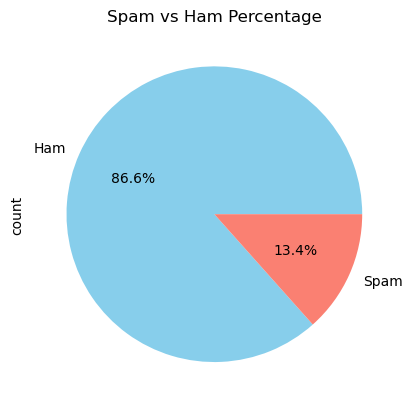

In [11]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Ham','Spam'], colors=['skyblue','salmon'])
plt.title("Spam vs Ham Percentage")
plt.show()

**Text Preprocessing**

In [12]:
# Simple cleaning: lowercase
df['message'] = df['message'].str.lower()
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42)
# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

**WordCloud Visualization**

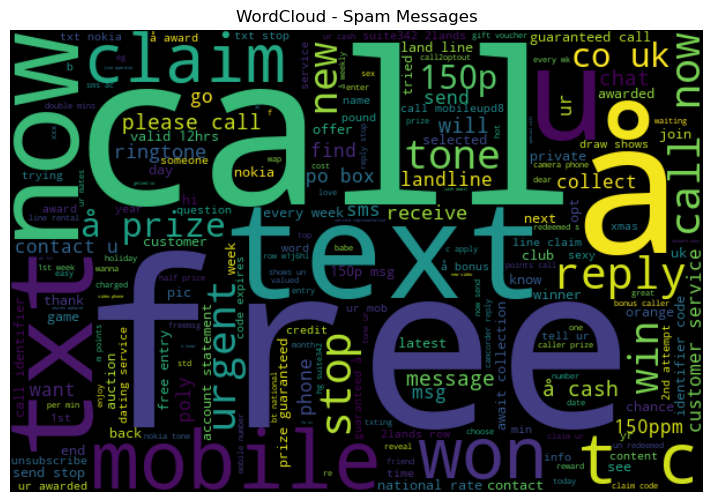

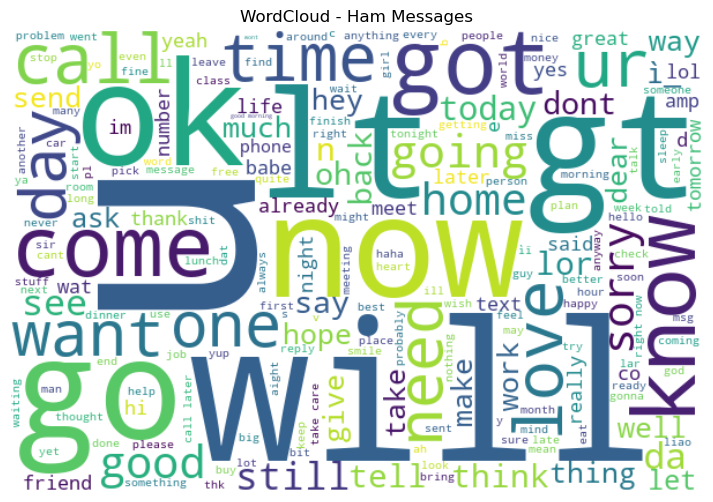

In [13]:
spam_words = ' '.join(df[df['label']==1]['message'])
ham_words = ' '.join(df[df['label']==0]['message'])
plt.figure(figsize=(12,6))
wc_spam = WordCloud(width=600, height=400, background_color='black').generate(spam_words)
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Spam Messages")
plt.show()
plt.figure(figsize=(12,6))
wc_ham = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Ham Messages")
plt.show()

**Train Models**

In [21]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)

**Evaluation Reports**

In [22]:
print("Logistic Regression:\n", classification_report(y_test, lr_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



**Accuracy Calculation**

In [23]:
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

Logistic Regression Accuracy: 0.9525


**Confusion Matrix Visualization**

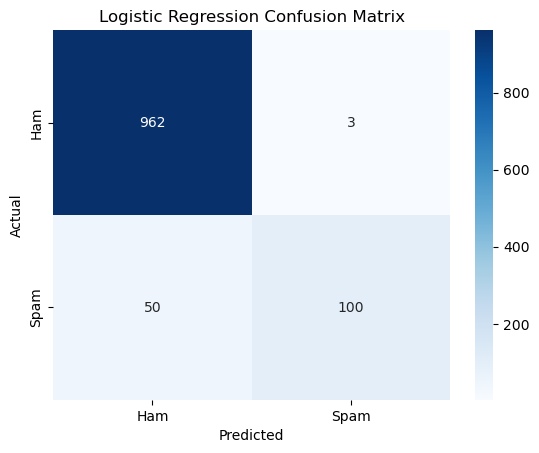

In [24]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
plot_confusion(y_test, lr_pred, "Logistic Regression Confusion Matrix")

**Feature Importance**

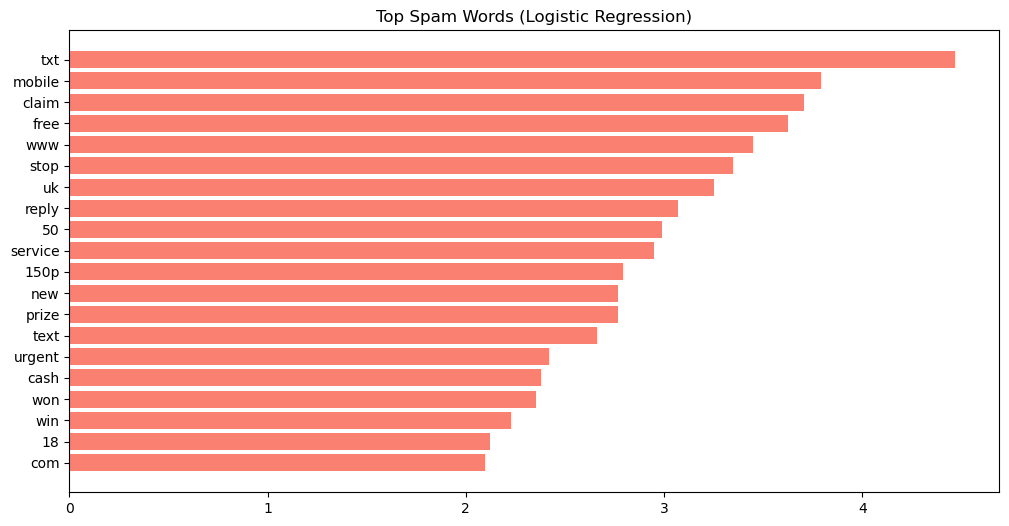

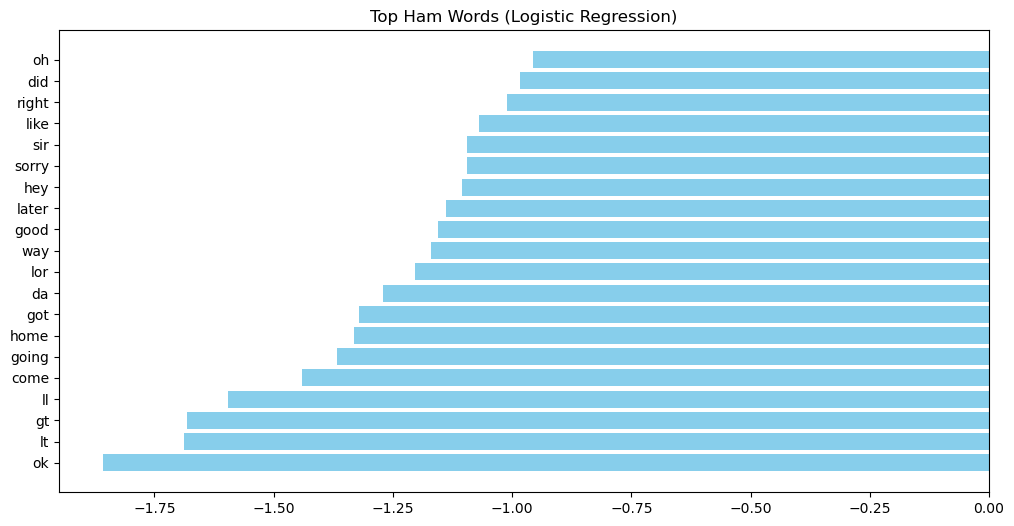

In [19]:
# Show top spam-indicative words from Logistic Regression
feature_names = np.array(vectorizer.get_feature_names_out())
coefs = lr_model.coef_[0]
top_positive = np.argsort(coefs)[-20:]
top_negative = np.argsort(coefs)[:20]

plt.figure(figsize=(12,6))
plt.barh(feature_names[top_positive], coefs[top_positive], color='salmon')
plt.title("Top Spam Words (Logistic Regression)")
plt.show()

plt.figure(figsize=(12,6))
plt.barh(feature_names[top_negative], coefs[top_negative], color='skyblue')
plt.title("Top Ham Words (Logistic Regression)")
plt.show()

In [27]:
def predict_sms(message, model, vectorizer):
    # Preprocess: lowercase
    message = message.lower()
    
    # Transform using the same TF-IDF vectorizer
    message_tfidf = vectorizer.transform([message])
    
    # Predict
    pred = model.predict(message_tfidf)[0]
    
    # Map back to label
    return "Spam" if pred == 1 else "Ham"

# Example test
test_message = "Congratulations! You have won a free ticket. Call now!"
print("Message:", test_message)
print("Prediction (Logistic Regression):", predict_sms(test_message, lr_model, vectorizer))


Message: Congratulations! You have won a free ticket. Call now!
Prediction (Logistic Regression): Spam
